IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Dataset

In [2]:
dataset=pd.read_csv('/content/breast_cancer.csv')
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

Splitting the datset into training set and test set

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

Feature Scaling

In [4]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
y_train=en.fit_transform(y_train)
y_test=en.transform(y_test)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [6]:
y_pred=classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
acc=accuracy_score(y_pred,y_test)


In [8]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_test,y=y_test,cv=10)
acc=accuracies.mean()
std=acc.std()

In [9]:
print(acc,std)

0.9735177865612649 0.0


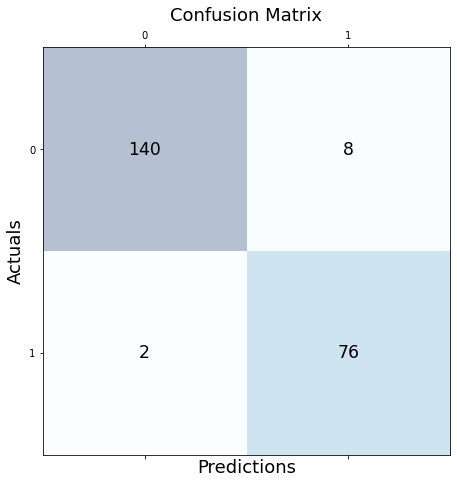

In [10]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()